# Horizon3D Class - ODBind Python Bindings

In [1]:
import os
import sys

**If this notebook is not opened from OpendTect then the following paths should be set for your system and the cell executed.**

In [2]:
odpy_path = '/home/wayne/Work/WMSeismicSolutions/dGB/Development/Build/bin/odmain/bin/python'
data_root = '/mnt/Data/seismic/ODData'
sys.path.insert(0,odpy_path)
os.environ["DTECT_DATA"] = data_root

In [3]:
import numpy as np
import odbind as odb

## Horizon3D class

The Horizon3D class provides access to 3D horizons in an OpendTect project/survey. A Survey object is required for context.

The user must create an **Horizon3D** object to access a specific 3D horizon. There are 2 constructors provided:
-   **Horizon3D( survey:odSurvey, horizon_name:str )** which opens an existing horizon called "horizon_name" if it exists or raises an exception.
-   **Horizon3D.create( survey:odSurvey, horizon_name:str, iline_range:range, xline_range:range, overwrite:bool )** which creates a new 3D horizon called "horizon_name" with the specified extents. By default "overwrite" is set to false so if "horizon_name" already exists the statement will fail but if true any existing 3D horizon of the same name will be replaced.

In [4]:
f3demo = odb.Survey(data_root, 'F3_Demo_2020')

### Horizon3D.info() function
Returns basic information for a 3D horizon in a Python dictionary

In [5]:
mfs4 = odb.Horizon3D(f3demo, 'Demo 1 --> MFS4')
mfs4.info()

{'name': 'Demo 1 --> MFS4',
 'inl_range': [100, 750, 1],
 'crl_range': [300, 1250, 1],
 'z_range': [0.528257012367249, 1.09793794155121],
 'attrib_count': 3}

### Horizon3D.attribnames property
Return a list of the attributes attached to this horizon.

In [6]:
mfs4.attribnames

['SD_24Hz[-8,24ms]', 'SD_44Hz[-8,24ms]', 'SD_64Hz[-8,24ms]']

### Horizon3D.ilines and Horizon3D.xlines properties
Return a list of the inline and crossline numbers covered by the horizon.

In [7]:
mfs4.ilines[0:10]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

### Horizon3D.getz(), Horizon3D.getxy() and Horizon3D.get_xarray() functions

-  getz(): return a Numpy 2D array with the horizon Z values
-  getxy(): return a tuple of Numpy 2D arrays with the X and Y coordinates of the horizon z values
-  get_xarray(): return an XArray DataArray with the horizon X, Y and Z values

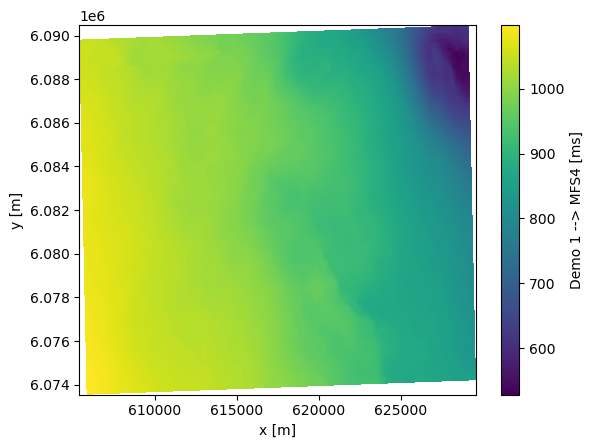

In [8]:
import xarray as xr
hor = mfs4.get_xarray()
xr.plot.pcolormesh(hor, x='x', y='y')

### Horizon3D.putz(), Horizon3D.putz_bycoord and Horizon3D.put_xarray functions

-  putz(): takes a Numpy 2D array of Z values, an inline number list/array and a crossline number list/array and saves it to an horizon
-  putz_bycoord(): takes a Numpy 2D array of z values, an array of X locations and an array of Y locations and saves it to an horizon
-  put_xarray(): takes horizon Z values and locations from a XArray DataFrame and saves it to an horizon

In all case values outside the creation limits of the horizon will be ignored.

In [9]:
newhor = odb.Horizon3D.create(f3demo, 'newhor', [300,400,1], [500,700,1], True)

In [10]:
newhor_z = newhor.get_xarray()
newhor_z[:] = 900.0
newhor.put_xarray(newhor_z)

In [11]:
newhor_read = odb.Horizon3D(f3demo,'newhor')
newhor_read.info()

{'name': 'newhor',
 'inl_range': [300, 400, 1],
 'crl_range': [500, 700, 1],
 'z_range': [0.9, 0.9],
 'attrib_count': 0}

### Horizon3D.feature() function
Returns a GeoJSON feature collection with the outline of the 3D horizon. This can be used in map displays.

In [12]:
mfs4.feature()

'{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"name":"Demo 1 --> MFS4","inl_range":[100,750,1],"crl_range":[300,1250,1],"z_range":[0.528257012367249,1.09793794155121],"attrib_count":3},"geometry":{"type":"Polygon","coordinates":[[["4.644803","54.796120"],["4.643676","54.942126"],["5.014355","54.942512"],["5.014145","54.796514"],["4.644803","54.796120"]]]}}]}'

In [13]:
import folium
survmap = folium.Map(location=[52.3,8.0], tiles="Stamen Terrain", zoom_start = 6, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=True, maxBoundsViscosity=1)
folium.GeoJson(mfs4.feature(), popup=folium.GeoJsonPopup(fields=['name'])).add_to(survmap)
survmap

## Static methods
A number of methods are provided to get information either for all or a selected number of 3D horizons in the user provided survey.

In [14]:
hors = odb.Horizon3D.names(f3demo)
hors

['Demo 7 --> shallow',
 'Demo 6 --> FS8',
 'Demo 5 --> FS7',
 'Demo 4 --> Truncation',
 'Demo 3  --> Top Foresets',
 'Demo 2 --> FS6',
 'Demo 1 --> MFS4',
 'Demo 0 --> FS4',
 'Trim_D6 --> FS8',
 'Trim_D5 --> FS7',
 'Trim_D4 --> Truncation',
 'Trim_D0 --> FS4',
 'test',
 'newhor']

### Horizon3D.infos() and Horizon3D.infos_dataframe() functions
These return a dictionary and a Pandas DataFrame respectively with basic information for the listed horizons (or all horizons if no list provided) in the given survey.

In [15]:
odb.Horizon3D.infos_dataframe(f3demo)

,name,inl_range,crl_range,z_range,attrib_count
0,Demo 7 --> shallow,"[104, 745, 1]","[304, 1248, 1]","[1e+30, 1e+30]",0
1,Demo 6 --> FS8,"[100, 750, 1]","[300, 1250, 1]","[0.415428012609482, 0.86045902967453]",0
2,Demo 5 --> FS7,"[100, 750, 1]","[300, 1250, 1]","[0.45720899105072, 1.0261709690094]",0
3,Demo 4 --> Truncation,"[100, 750, 1]","[300, 1250, 1]","[0.458209007978439, 1.070765018463135]",0
4,Demo 3 --> Top Foresets,"[106, 747, 1]","[303, 1246, 1]","[1e+30, 1e+30]",1
5,Demo 2 --> FS6,"[106, 748, 1]","[612, 1248, 1]","[1e+30, 1e+30]",0
6,Demo 1 --> MFS4,"[100, 750, 1]","[300, 1250, 1]","[0.528257012367249, 1.09793794155121]",3
7,Demo 0 --> FS4,"[100, 750, 1]","[300, 1250, 1]","[0.574454009532928, 1.126086950302124]",1
8,Trim_D6 --> FS8,"[105, 747, 1]","[303, 1247, 1]","[0.415428012609482, 0.86045902967453]",0
9,Trim_D5 --> FS7,"[103, 747, 1]","[303, 1247, 1]","[0.45720899105072, 1.0254670381546]",0


### Horizon3D.features() function

Returns a GeoJSON feature collection for the listed horizons (or all horizons if no list provided) in the given survey. This can be used to create map displays.

In [16]:
odb.Horizon3D.features(f3demo, hors[6:8])

'{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"name":"Demo 1 --> MFS4","inl_range":[100,750,1],"crl_range":[300,1250,1],"z_range":[0.528257012367249,1.09793794155121],"attrib_count":3},"geometry":{"type":"Polygon","coordinates":[[["4.644803","54.796120"],["4.643676","54.942126"],["5.014355","54.942512"],["5.014145","54.796514"],["4.644803","54.796120"]]]}},{"type":"Feature","properties":{"name":"Demo 0 --> FS4","inl_range":[100,750,1],"crl_range":[300,1250,1],"z_range":[0.574454009532928,1.126086950302124],"attrib_count":1},"geometry":{"type":"Polygon","coordinates":[[["4.644803","54.796120"],["4.643676","54.942126"],["5.014355","54.942512"],["5.014145","54.796514"],["4.644803","54.796120"]]]}}]}'